In [1]:
import numpy as np
import pandas as pd

In [2]:
#Dataset Information:
#validation dataset : surprise 797 fear 1018 angry 960 neutral 1216 sad 1139 disgust 111 happy 1825
#train dataset : surprise 3205 fear 4103 angry 3993 neutral 4982 sad 4938 disgust 436 happy 7164

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from matplotlib import pyplot as plt

In [4]:
train_data=r'dataset\train'
validation_data=r'dataset\validation'

In [5]:
# for train dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#for validation dataset
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#image height
IMG_HEIGHT=48
#image width 
IMG_WIDTH = 48
#batch size
batch_size=32
seed = 42

In [7]:
# create training sets
train_generator = train_datagen.flow_from_directory(train_data,
                                                    color_mode='grayscale',
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=seed)

Found 28821 images belonging to 7 classes.


In [8]:
#create Validation sets
validation_generator = validation_datagen.flow_from_directory(validation_data,
                                                              color_mode='grayscale',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle=True,
                                                              seed=seed)

Found 7066 images belonging to 7 classes.


In [9]:
class_labels=['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

In [10]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(7, activation='softmax'))

In [11]:
#get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [12]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# determine early stoping mechanism
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

# Instantiate ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min',
                             verbose=1)

# reduce learning rate mechanism
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# make callback as a list
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


In [14]:
#epoch size
epochs=50
num_train_imgs=28821
num_test_imgs=7066

# fit model
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//train_generator.batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//validation_generator.batch_size,
                callbacks=callbacks_list)

Epoch 1/50
900/900 [==============================] - ETA: 0s - loss: 1.8728 - accuracy: 0.2516
Epoch 1: val_loss improved from inf to 1.70827, saving model to best_model.h5


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


900/900 [==============================] - 414s 458ms/step - loss: 1.8728 - accuracy: 0.2516 - val_loss: 1.7083 - val_accuracy: 0.3318 - lr: 0.0010
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 1.6430 - accuracy: 0.3556
Epoch 2: val_loss improved from 1.70827 to 1.55430, saving model to best_model.h5
900/900 [==============================] - 369s 410ms/step - loss: 1.6430 - accuracy: 0.3556 - val_loss: 1.5543 - val_accuracy: 0.3973 - lr: 0.0010
Epoch 3/50
900/900 [==============================] - ETA: 0s - loss: 1.4947 - accuracy: 0.4194
Epoch 3: val_loss improved from 1.55430 to 1.34841, saving model to best_model.h5
900/900 [==============================] - 370s 411ms/step - loss: 1.4947 - accuracy: 0.4194 - val_loss: 1.3484 - val_accuracy: 0.4798 - lr: 0.0010
Epoch 4/50
900/900 [==============================] - ETA: 0s - loss: 1.4148 - accuracy: 0.4563
Epoch 4: val_loss did not improve from 1.34841
900/900 [==============================] - 347s 386ms/ste

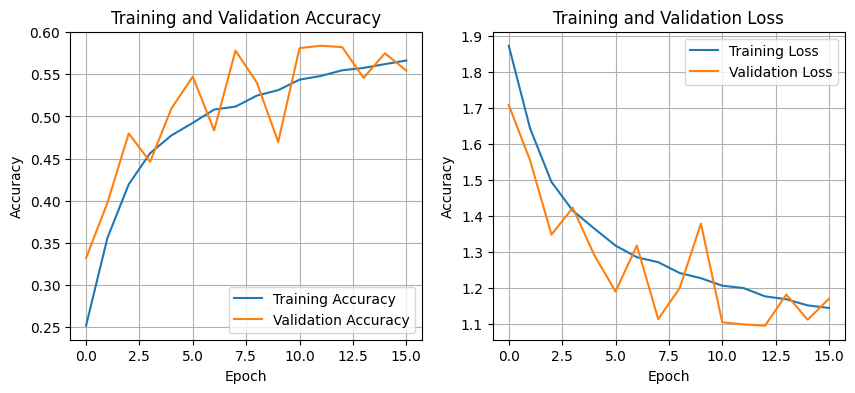

In [19]:
import matplotlib.pyplot as plt
epochs = 16

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
#plot traing and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

#plot traing and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [20]:
from sklearn.metrics import classification_report
import numpy as np

# Generate predictions for the validation data
y_pred = model.predict(validation_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the validation generator
y_true = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

221/221 [==============================] - 14s 63ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.13      0.12      0.12       960
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.07      0.09      1018
       happy       0.26      0.33      0.29      1825
     neutral       0.16      0.21      0.18      1216
         sad       0.16      0.15      0.15      1139
    surprise       0.11      0.11      0.11       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.17      0.18      0.17      7066



In [22]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
training_loss, training_accuracy = model.evaluate(train_generator)

901/901 [==============================] - 66s 74ms/step - loss: 1.1665 - accuracy: 0.5555


In [23]:
print("validation_accuracy: ",validation_accuracy)

validation_accuracy:  0.5823662877082825


In [24]:
print("training_accuracy: ",training_accuracy)

training_accuracy:  0.5554977059364319
